In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap


In [5]:
# Silenciar warnings de matplotlib
matplotlib_axes_logger = logging.getLogger('matplotlib.axes')
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("./dataset/compra_en_linea.csv", sep=";")

X = df[["Edad", "Salario"]].values
y = df["Compro"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


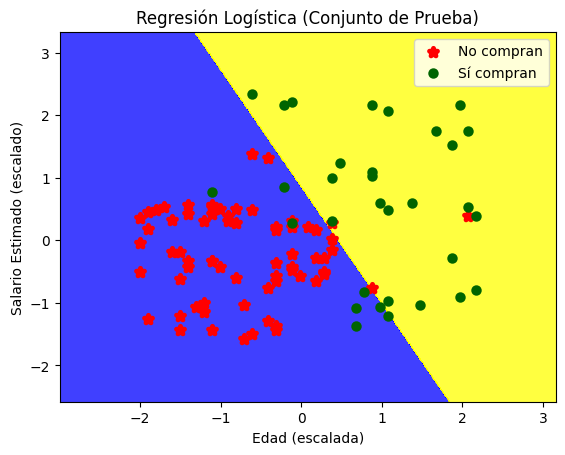

In [10]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(["blue", "yellow"])
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = ["red", "darkgreen"]
markers = ["*", "o"]
labels = ["No compran", "Sí compran"]
sizes = [3.5, 1.5]

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=colors[i], label=labels[j],
        marker=markers[j], linewidths=sizes[j]
    )

plt.title("Regresión Logística (Conjunto de Prueba)")
plt.xlabel("Edad (escalada)")
plt.ylabel("Salario Estimado (escalado)")
plt.legend()
plt.show()
